## Spatial Filtering

### Introduction

In Earth Observation (EO) analysis, spatial filtering is a powerful technique used to modify pixel values based on their spatial relationships with neighboring pixels. Unlike masking, which selectively includes or excludes specific pixels based on criteria like quality flags or classification values, spatial filtering focuses on altering the image to achieve effects such as noise reduction, edge enhancement, or feature extraction.

Spatial filters can be broadly categorized into two main types:
- **Smoothing Filters**: These filters reduce noise by averaging pixel values with their neighbors, leading to a smoother image.
- **Edge-Detection Filters**: These filters highlight the boundaries between different regions in an image, making features more pronounced by detecting edges.

Understanding the distinction between masking and spatial filtering is crucial for effectively processing and analyzing satellite imagery.

### In this notebook, you will explore the following concepts:

A. **Spatial Filtering**: Grasp the core principles of spatial filtering and understand how it differs from masking, particularly in the context of EO analysis.

B. **Smoothing**: Use the `apply_kernel` process in openEO to apply a smoothing filter (mean kernel) to a Sentinel-2 image. This process will help in reducing noise and producing a cleaner image.

C. **Edge Detections**: Implement Sobel filters to detect horizontal and vertical edges in a Sentinel-2 image, making boundaries and transitions within the image more visible.

Additionally, during exercises B and C, you will explore how different kernel sizes, weights, and combinations of filters influence the output. This exploration will allow you to refine your analysis and enhance specific features in the image.

### Tools and Libraries

- **openEO**: To perform spatial filtering operations on satellite imagery.
- **Matplotlib and Custom Helpers**: We will use `matplotlib` and a custom `show_image` function to visualize the filtered images and understand the effects of spatial filtering.

### Learning Outcomes

By the end of this notebook, you will be able to:
- Distinguish between masking and spatial filtering in EO analysis.
- Apply spatial filtering techniques to satellite imagery using openEO.
- Visualize and interpret the effects of spatial filtering on satellite images.

### Let's Get Started

First, we'll import the necessary Python libraries and establish a connection to the openEO backend. Then, we'll dive into the conceptual differences between masking and spatial filtering.


In [1]:
import openeo
from config import user, passwd, eo_service_url
from demo_regions import s2
from demo_helpers import show_result
import matplotlib.pyplot as plt


In [2]:
conn = openeo.connect(eo_service_url)
conn.authenticate_basic(username=user, password=passwd)

<Connection to 'https://openeo.digitalearth.se/' with BasicBearerAuth>

## A. Understanding Spatial Filtering
### Clarifying the Difference Between Masking and Spatial Filtering

In Earth Observation (EO) analysis, masking and spatial filtering are two distinct but complementary techniques used for processing satellite imagery. Understanding the difference between these methods is essential for effectively analyzing and interpreting data.

#### Masking
Masking is a technique used to include or exclude specific pixels in an image or data cube based on predefined criteria. This process is typically used to focus analysis on relevant data by removing unwanted areas, such as clouds, water bodies, or non-vegetation regions. There are two primary types of masking:
- **Value-Based Masking**: Pixels are filtered based on specific values in a classification layer, such as excluding all pixels classified as clouds.
- **Bitwise Masking**: Pixels are filtered based on specific bits within a quality flag, allowing for more granular control, such as excluding pixels that are flagged for cloud presence or saturation.

#### Spatial Filtering
Spatial filtering, on the other hand, is a technique used to modify pixel values based on their spatial relationships with neighboring pixels. This is achieved by applying a filter (a set of weights) across the image to achieve various effects:
- **Smoothing Filters**: Reduce noise by averaging the values of neighboring pixels, resulting in a smoother image.
- **Edge-Detection Filters**: Highlight boundaries between different regions in the image, enhancing features such as edges or transitions between land cover types.

While masking focuses on selecting or excluding pixels based on their classification or quality, spatial filtering is concerned with altering the appearance of the image by enhancing or suppressing specific features based on spatial context.

Understanding these differences is crucial for determining which technique to use depending on the specific goals of your analysis. Masking helps isolate the data of interest, while spatial filtering can enhance or refine the analysis of that data.


## Enhancing Satellite Imagery with Spatial Filtering in openEO

### Introduction

In Earth Observation (EO) analysis, enhancing the clarity and quality of satellite imagery is crucial for accurate interpretation and decision-making. Two important techniques used in image processing to achieve this are **masking** and **spatial filtering**. While both techniques are used to process images, they serve different purposes.

- **Masking**: Masking involves selectively including or excluding specific pixels based on predefined criteria, such as classification values or quality flags. This technique is typically used to focus analysis on relevant data by removing or isolating unwanted areas, such as clouds or water bodies.

- **Spatial Filtering**: Spatial filtering, on the other hand, modifies pixel values based on their spatial relationships with neighboring pixels. This technique is used to smooth out noise, sharpen features, and detect edges within the image, thereby enhancing the overall quality and usefulness of the data.

In this notebook, we will focus on spatial filtering, a technique that allows us to:
- **Reduce Noise**: By applying smoothing filters, we can create clearer images that are easier to analyze.
- **Enhance Features**: Edge-detection filters can highlight boundaries and transitions, making key features more prominent.

Using the `apply_kernel` process in openEO, we will explore how to use spatial filtering to improve satellite images.

### Objectives

By the end of this notebook, you will:
- Understand the concept of spatial filtering and how it differs from masking.
- Learn to apply smoothing and edge-detection filters using the `apply_kernel` process in openEO.
- Visualize and compare the effects of these filters on satellite imagery.

### Practical Examples

We will focus on two specific applications of spatial filtering:
- **Smoothing Filters**: Reduce noise in the image, creating a clearer and more coherent view of the data.
- **Edge-Detection Filters**: Highlight boundaries and transitions, making key features more prominent.

These techniques will be demonstrated using Band 8 (Near-Infrared) from Sentinel-2 imagery. We will also visualize the results to compare the original and filtered images, showing how these filters can enhance the data for more effective analysis.

### Let's Get Started

We'll begin by understanding the concept of spatial filtering, how it differs from masking, and its importance in EO analysis. Then, we'll apply these concepts practically using openEO to enhance satellite imagery.

## B. Applying Smoothing Filters, Understanding Spatial Filtering: Image Kernels and Convolution

### What is an Image Kernel?

An image kernel, also known as a filter, is a small matrix used in image processing to modify pixel values in an image. The kernel is applied to the image through a process called convolution, where the kernel is moved (or "convolved") across the image, and at each position, the values in the kernel are multiplied with the corresponding pixel values in the image. The results are then summed to produce a new value for the central pixel.

#### Why Use Image Kernels?

Image kernels are used to achieve various effects in image processing, such as:
- **Smoothing**: Reduces noise by averaging out pixel values, resulting in a smoother image.
- **Sharpening**: Enhances edges and fine details in an image, making features stand out more clearly.
- **Edge Detection**: Identifies boundaries between different regions in an image, highlighting transitions between different materials or objects.

### Common Filters Explained

1. **Smoothing Filter (Mean Filter)**:
   - **Kernel Example**:
   \[
   \begin{bmatrix}
   \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
   \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
   \frac{1}{9} & \frac{1}{9} & \frac{1}{9}
   \end{bmatrix}
   \]
   - **Effect**: Averages the pixel values within the 3x3 window, reducing sharp transitions and noise, resulting in a smoother image.

2. **Edge-Detection Filter (Sobel Filter)**:
   - **Vertical Kernel Example**:
   \[
   \begin{bmatrix}
   1 & 0 & -1 \\
   2 & 0 & -2 \\
   1 & 0 & -1
   \end{bmatrix}
   \]
   - **Horizontal Kernel Example**:
   \[
   \begin{bmatrix}
   1 & 2 & 1 \\
   0 & 0 & 0 \\
   -1 & -2 & -1
   \end{bmatrix}
   \]
   - **Effect**: Highlights vertical or horizontal edges by emphasizing changes in pixel values across the image.

### How Convolution Works

Convolution is the process of applying an image kernel to an image. Here's how it works in simple terms:
1. **Slide the Kernel**: The kernel is moved across the image, starting at the top-left corner and ending at the bottom-right corner.
2. **Multiply and Sum**: At each position, the values in the kernel are multiplied with the corresponding pixel values in the image. These products are then summed to produce a new value for the central pixel.
3. **Output the Result**: The result is a new image where each pixel value has been modified based on its neighbors, according to the kernel.

### Why This Matters

Understanding these concepts is crucial because they form the foundation for many image processing tasks in EO analysis. By knowing how kernels work, you can better interpret the results of spatial filtering and apply these techniques to enhance satellite imagery effectively.

In the next section, we'll apply these concepts practically using the `apply_kernel` process in openEO, starting with a simple smoothing filter.


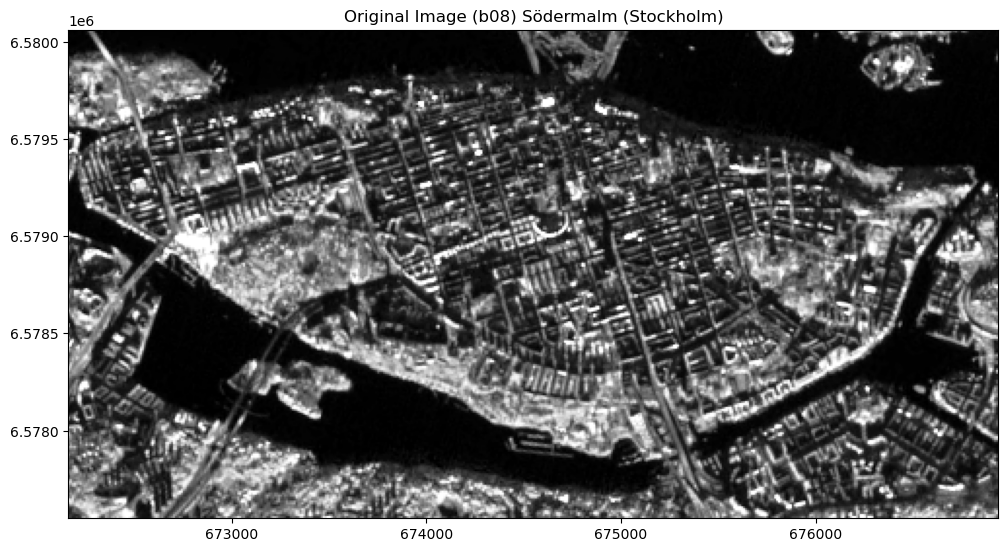

In [3]:
from demo_regions import s2
from IPython.display import display

# 1. Load the Sentinel-2 data cube for the Södermalm region, focusing on Band 8 (NIR)
s2_datacube = conn.load_collection(
    s2.s2_msi_l2a,
    spatial_extent=s2.bbox.sodermalm,
    temporal_extent=s2.timespans.one_image,
    bands=["b08"]  # Near-Infrared band (b08)
)

# 2. Define a 5x5 mean kernel for stronger smoothing
mean_kernel = [
    [1/25, 1/25, 1/25, 1/25, 1/25],
    [1/25, 1/25, 1/25, 1/25, 1/25],
    [1/25, 1/25, 1/25, 1/25, 1/25],
    [1/25, 1/25, 1/25, 1/25, 1/25],
    [1/25, 1/25, 1/25, 1/25, 1/25]
]

# 3. Apply the stronger smoothing filter to the loaded data using the apply_kernel process
smoothed_b08 = s2_datacube.apply_kernel(
    kernel=mean_kernel,
    factor=1.0  # Optional: factor to scale the result, here we keep it as 1
)

# 4. Execute the process and visualize the original B08 band
original_b08 = s2_datacube.download(format="gtiff")
 
_ = show_result(original_b08, is_ndvi=False, colormap="Greys_r", title="Original Image (b08) Södermalm (Stockholm)")

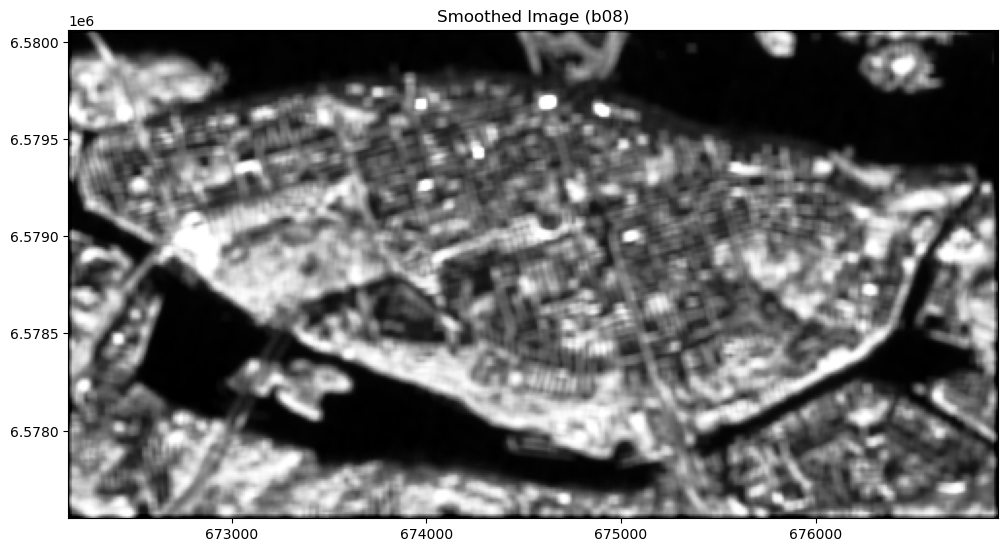

In [4]:
# 5. Execute the process and visualize the smoothed B08 band
filtered_b08 = smoothed_b08.download(format="gtiff")
 
_ = show_result(filtered_b08, is_ndvi=False, colormap="Greys_r",title = "Smoothed Image (b08)")

## Explaining the result
The image above appears blurred because we exaggerated the smoothing settings to make it easier to see the difference compared to the unsmoothed image. If you understand this, keep reading, and you'll learn how to reduce the smoothing to make it more useful.

### Code Explanation

1. **Load the Sentinel-2 data cube**:
   - We load a data cube containing Sentinel-2 imagery, focusing specifically on Band 8 (Near-Infrared). We specify the spatial extent (the region of interest) and the temporal extent (the date or time range) for the data we want to process.

2. **Define a 5x5 mean kernel for smoothing**:
   - We use a 5x5 mean kernel, where each value is `1/25`. This kernel averages the pixel values over a larger area (25 pixels), resulting in noticeable smoothing compared to a smaller kernel like 3x3.
   - **Controlling the Degree of Smoothing**:
     - **Smaller Kernel (e.g., 3x3)**: For less smoothing and more detail retention, use a smaller kernel, such as a 3x3 mean kernel. This will smooth the image slightly by averaging fewer pixels.
     - **Larger Kernel (e.g., 5x5 or 7x7)**: For more pronounced smoothing, use a larger kernel. The larger the kernel, the more neighboring pixels are included in the average, leading to a smoother image.
   - **Experimentation Advice**:
     - You can experiment with different kernel sizes (e.g., 3x3, 5x5, 7x7) to see how the amount of smoothing changes. A larger kernel generally results in a smoother image, but it may also blur important details.
     - You can also try different values within the kernel, such as giving more weight to the central pixel or using a Gaussian distribution for a more natural blur.
   - **Note on Exaggeration**:
     - The use of a 5x5 kernel in this example is somewhat exaggerated to make the effect of the smoothing filter visually obvious. In practical applications, a smaller kernel, such as 3x3 or using a Gaussian blur, might be more appropriate, as it balances noise reduction with detail preservation.

3. **Apply the smoothing filter**:
   - The defined 5x5 mean kernel is applied to the data cube using the `apply_kernel` process. The kernel is convolved with the image, averaging pixel values over the 5x5 neighborhood to achieve noticeable smoothing.

4. **Execute the process and visualize the original B08 band**:
   - The original Band 8 (Near-Infrared) image is downloaded in GeoTIFF format. We use the `display` function to output text indicating that this is the original image, followed by visualizing it using the `show_result` function.

5. **Execute the process and visualize the smoothed B08 band**:
   - The smoothed image, processed using the 5x5 kernel, is downloaded and visualized. Again, we use `display` to label this output as the smoothed image, providing a clear comparison between the original and smoothed images.


## C. Edge Detection with Sobel Filter 

#### What is Edge Detection?

Edge detection is a technique used in image processing to identify and highlight boundaries between different regions within an image. These boundaries often correspond to significant changes in pixel values, which can indicate transitions between different materials, objects, or terrain types. In satellite imagery, edges might represent the borders between water and land, urban areas and forests, or different vegetation types.

#### Why is Edge Detection Important in EO Analysis?

In Earth Observation, edge detection is crucial for:
- **Feature Extraction**: Identifying and delineating features such as roads, rivers, and building outlines.
- **Change Detection**: Monitoring how landscapes change over time by comparing edges in images taken at different times.
- **Land Cover Classification**: Assisting in the classification of land cover types by highlighting distinct boundaries.

#### How Does Edge Detection Work?

Edge detection typically involves applying a convolution operation with a specialized kernel that accentuates areas of the image where there are sharp changes in intensity. One of the most commonly used kernels for edge detection is the Sobel operator, which is designed to detect edges in both the horizontal and vertical directions.

##### The Sobel Operator

The Sobel operator uses two 3x3 kernels:
- **Horizontal Kernel**:
  \[
  \begin{bmatrix}
  1 & 0 & -1 \\
  2 & 0 & -2 \\
  1 & 0 & -1
  \end{bmatrix}
  \]
  This kernel detects edges by emphasizing changes in pixel values along the horizontal axis.

- **Vertical Kernel**:
  \[
  \begin{bmatrix}
  1 & 2 & 1 \\
  0 & 0 & 0 \\
  -1 & -2 & -1
  \end{bmatrix}
  \]
  This kernel detects edges by emphasizing changes in pixel values along the vertical axis.

When these kernels are applied to an image, they highlight regions where there are significant differences between neighboring pixels, often indicating the location of edges.

#### Combining Horizontal and Vertical Edges

In practice, edge detection is usually performed by applying both the horizontal and vertical Sobel kernels to the image. The resulting images can then be combined to produce a final edge map that highlights edges in all directions.

#### Practical Application

In the following example, we will use the `apply_kernel` process in openEO to apply the Sobel operator to a Sentinel-2 image. This will allow us to detect and visualize the edges within the image, revealing important features that may not be immediately apparent in the raw data.


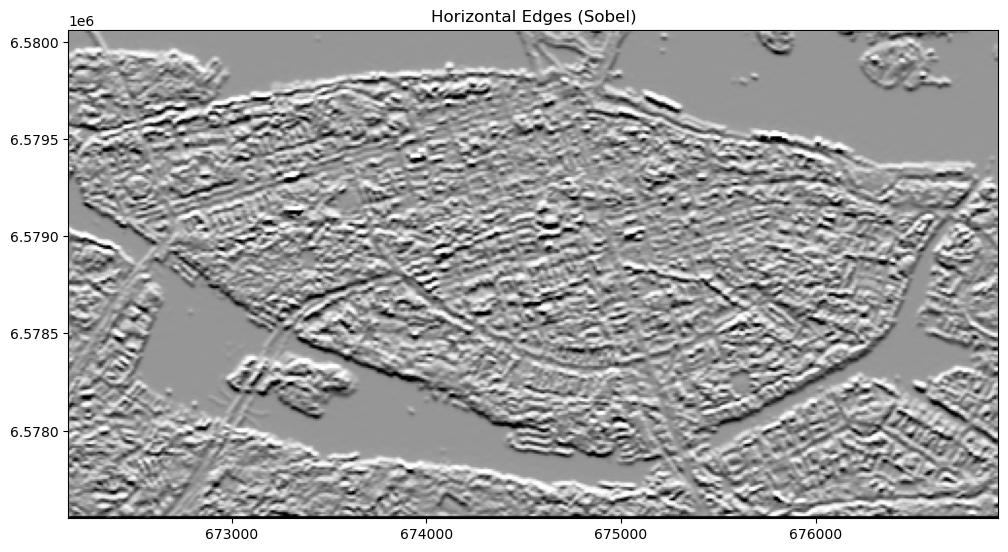

In [5]:
from demo_regions import s2
from IPython.display import display

# 1. Load the Sentinel-2 data cube for the Södermalm region, focusing on Band 8 (NIR)
s2_datacube = conn.load_collection(
    s2.s2_msi_l2a,
    spatial_extent=s2.bbox.sodermalm,
    temporal_extent=s2.timespans.one_image_cloudfree_sthlm,
    bands=["b08"]  # Near-Infrared band (b08)
)

# 2. Define Sobel kernels for edge detection
sobel_horizontal = [
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
]

sobel_vertical = [
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
]

# 3. Apply the horizontal Sobel filter to the loaded data using the apply_kernel process
edges_horizontal = s2_datacube.apply_kernel(
    kernel=sobel_horizontal,
    factor=1.0  # Optional: factor to scale the result, here we keep it as 1
)

# 4. Apply the vertical Sobel filter to the loaded data using the apply_kernel process
edges_vertical = s2_datacube.apply_kernel(
    kernel=sobel_vertical,
    factor=1.0  # Optional: factor to scale the result, here we keep it as 1
)

# 5. Execute the process and visualize the horizontal edges
filtered_horizontal = edges_horizontal.download(format="gtiff")

_ = show_result(filtered_horizontal, is_ndvi=False, colormap="Greys_r", title="Horizontal Edges (Sobel)")

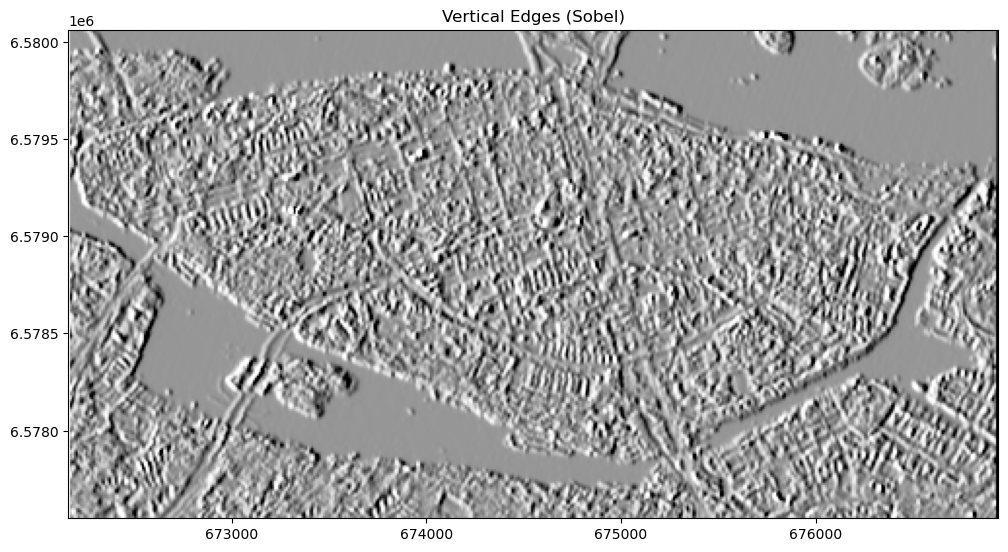

In [6]:
# 6. Execute the process and visualize the vertical edges
filtered_vertical = edges_vertical.download(format="gtiff")
 
_ = show_result(filtered_vertical, is_ndvi=False, colormap="Greys_r", title="Vertical Edges (Sobel)")

### Code Explanation

1. **Load the Sentinel-2 data cube**:
   - We load a data cube containing Sentinel-2 imagery, focusing specifically on Band 8 (Near-Infrared). We specify the spatial extent (the region of interest) and the temporal extent (the date or time range) for the data we want to process.

2. **Define Sobel kernels for edge detection**:
   - We define two 3x3 Sobel kernels, one for detecting horizontal edges and one for detecting vertical edges.
   - The **horizontal kernel** emphasizes changes in pixel values along the horizontal axis, detecting vertical edges.
   - The **vertical kernel** emphasizes changes in pixel values along the vertical axis, detecting horizontal edges.

3. **Apply the horizontal Sobel filter**:
   - The horizontal Sobel kernel is applied to the data cube using the `apply_kernel` process. This highlights vertical edges in the image by emphasizing horizontal changes in pixel values.

4. **Apply the vertical Sobel filter**:
   - The vertical Sobel kernel is applied to the data cube using the `apply_kernel` process. This highlights horizontal edges in the image by emphasizing vertical changes in pixel values.

5. **Visualize the horizontal edges**:
   - The image processed with the horizontal Sobel kernel is downloaded and visualized. We use `display` to label this output as the result of the horizontal Sobel filter.

6. **Visualize the vertical edges**:
   - The image processed with the vertical Sobel kernel is downloaded and visualized. We use `display` to label this output as the result of the vertical Sobel filter.

### Suggestions for Experimentation

- **Combining Horizontal and Vertical Edges**:
  - **Combine Edge Maps**: Try adding the horizontal and vertical edge maps together to create a comprehensive edge map. This will highlight edges in all directions, giving you a fuller picture of the boundaries within the image.
  - **Expected Effect**: The combined edge map will show both vertical and horizontal edges, making it easier to detect features like buildings, roads, and other linear structures.

- **Adjusting the Kernel Size**:
  - **Experiment with Different Kernel Sizes**: Modify the Sobel kernels to 5x5 or 7x7 and apply them to the image. This will give you a sense of how kernel size impacts edge detection.
  - **Expected Effect**: Larger kernels will result in broader, more generalized edges, potentially smoothing over finer details. This might be useful for highlighting large, prominent features while ignoring smaller, less significant edges.

- **Altering the Kernel Values**:
  - **Modify Kernel Weights**: Experiment with changing the values in the Sobel kernels, such as increasing the weight of the center pixel or reducing the extremes. This can help you understand how different emphasis affects edge detection.
  - **Expected Effect**: Altering the kernel weights will change the sensitivity of the edge detection, potentially making it more or less responsive to subtle changes in pixel values.

- **Applying Pre-Smoothing**:
  - **Combine with Smoothing Filters**: Apply a smoothing filter (like the one from the previous example) before performing edge detection. This can help reduce noise in the image and improve the quality of the edge detection.
  - **Expected Effect**: Pre-smoothing will likely result in cleaner, more defined edges by reducing the influence of noise. However, it might also blur some impo
